In [1]:
import pandas as pd
import numpy as np

import nltk
from nltk import bigrams
import itertools
import collections
from collections import defaultdict

from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
import re

import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
from plotly import tools
#import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot

In [3]:
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [5]:
with open('Panchatantra.txt', 'r', encoding = 'latin-1', errors='ignore') as file:
    data = file.read().replace('\n', '')

In [6]:
sns.set(font_scale=1.5)

In [ ]:
import nltk
nltk.download()
text= TextBlob(data)
my_list=text.tags

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
my_list[:10]

In [ ]:
tags_data = pd.DataFrame(my_list)

In [ ]:
tags_data.to_csv("tags_data")

In [ ]:
sentiment=[]
x=0

for sentence in text:
    text.sentiment

for sentence in text.sentences:
    sentiment.append(sentence.sentiment)
    
sentence_df = pd.DataFrame(sentiment)
sentence_df.describe()

In [ ]:
text[0:1000]

In [ ]:
text.sentences[1720]

In [12]:
sentence_df

,polarity,subjectivity
0,0.000000,0.000000
1,0.000000,0.000000
2,0.016667,0.483333
3,0.000000,0.100000
4,0.150000,0.450000
...,...,...
3488,0.375000,0.750000
3489,0.375000,0.750000
3490,0.400000,1.000000
3491,0.000000,0.000000


In [13]:
sentence_df.index

RangeIndex(start=0, stop=3493, step=1)

In [ ]:
sentence_df['index'] = sentence_df.index
sentence_df = pd.DataFrame(sentiment)
sentence_df['index'] = sentence_df.index
polarity = pd.Series(sentence_df["polarity"])

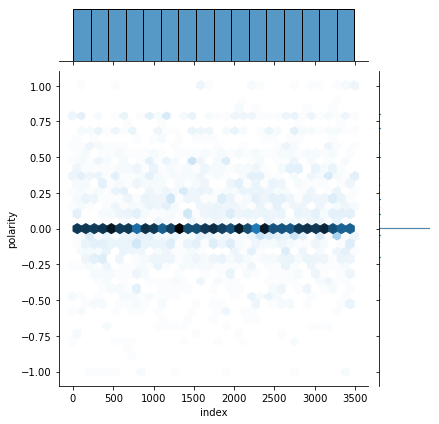

In [17]:
sns.jointplot("index", "polarity", data=sentence_df, kind="hex")

In [19]:
text.sentences[900]

Sentence("Karataka then told Damanaka, "You have done this foul deed because you were jealous of the king's friendship with Sanjeevaka.")

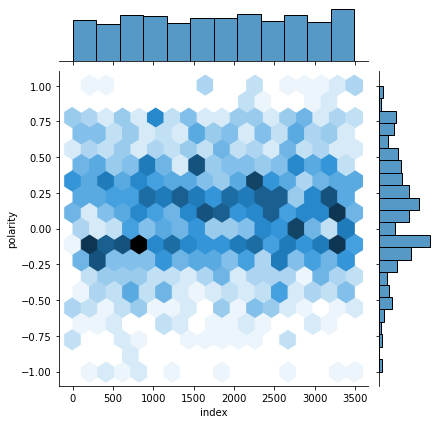

In [20]:
sns.jointplot("index", "polarity", data=sentence_df[sentence_df.polarity != 0], kind="hex")

In [21]:
subjectivity = pd.Series(sentence_df["subjectivity"])

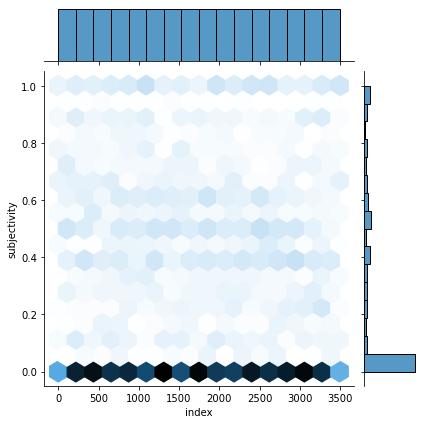

In [22]:
sns.jointplot("index", "subjectivity", data=sentence_df, kind="hex")

<AxesSubplot:xlabel='subjectivity', ylabel='Density'>

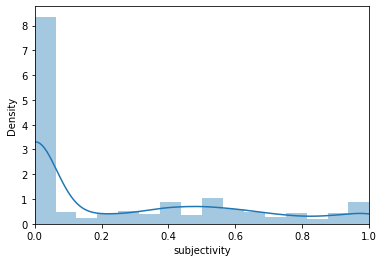

In [23]:
plt.xlim(0, None)
sns.distplot(subjectivity)

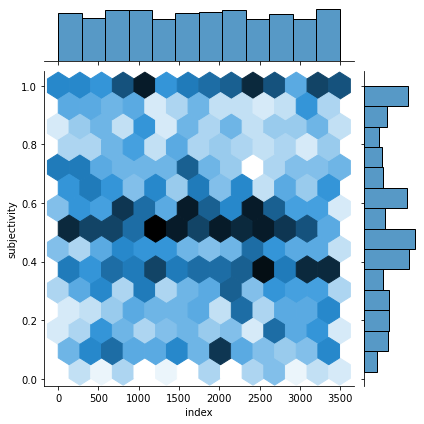

In [25]:
sns.jointplot("index", "subjectivity", data=sentence_df[sentence_df.subjectivity != 0], kind="hex")

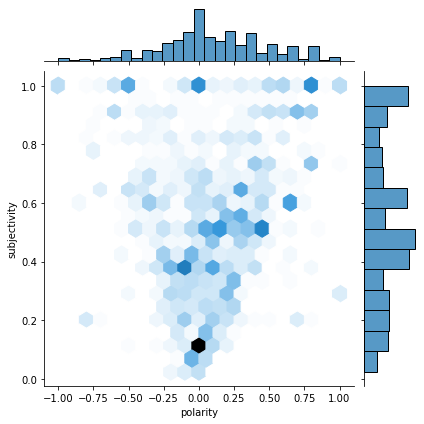

In [27]:
sns.jointplot("polarity", "subjectivity", data=sentence_df[(sentence_df.subjectivity != 0)], kind="hex")

In [28]:
full_t = pd.DataFrame(my_list)

Text(0.5, 1.0, 'Panchatantra - top 20 word types used')

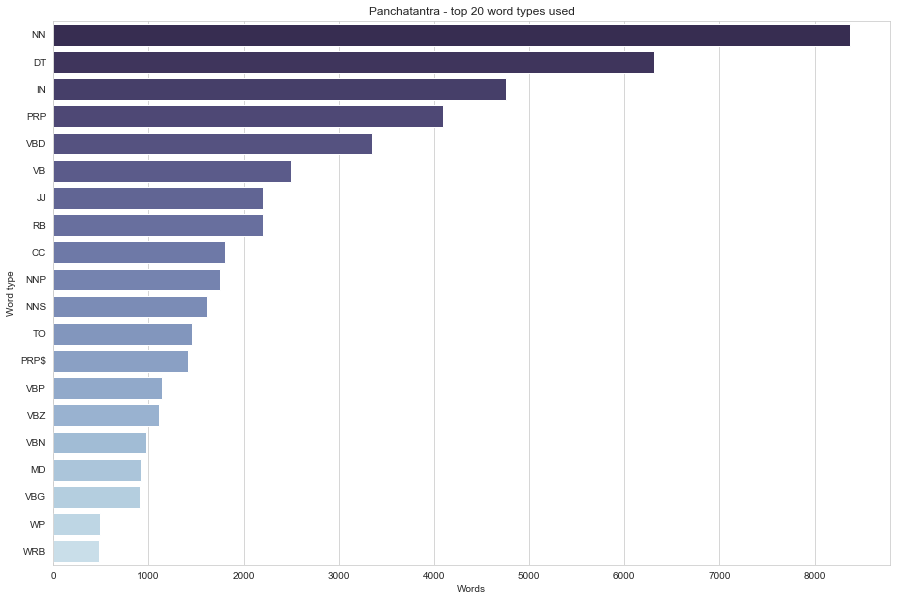

In [29]:
full_t.columns = ['Words', "Word type"]
xft=full_t.groupby('Word type').count().reset_index()
top20ft=xft.nlargest(20, 'Words')

sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x="Words", y="Word type", palette="ch:.25,rot=-.25, dark=.2_r", saturation=0.9, data=top20ft).set_title("Panchatantra - top 20 word types used")

Text(0.5, 1.0, 'Panchatantra - top 10 words used')

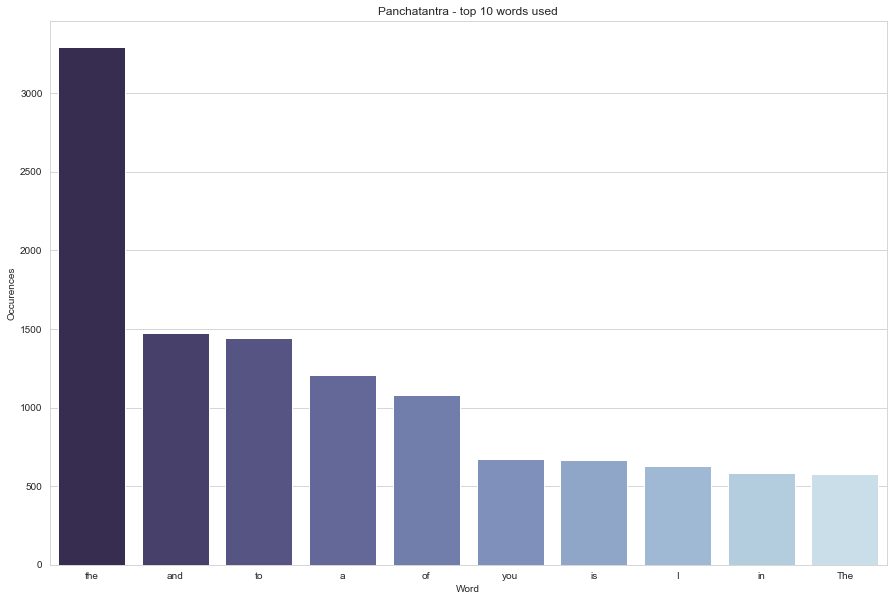

In [30]:
full = pd.DataFrame(my_list)
full.columns = ["Word", "Occurences"]
xf=full.groupby('Word').count().reset_index()

top10f=xf.nlargest(10, 'Occurences')
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.barplot(x="Word", y="Occurences", palette="ch:.25,rot=-.25, dark=.2_r", saturation=0.9, data=top10f).set_title("Panchatantra - top 10 words used")

In [31]:
top10f.head()

,Word,Occurences
4252,the,3293
885,and,1473
4321,to,1441
775,a,1208
3099,of,1079


In [32]:
def word_analysis(word_type, how_much):
    dict = {'NN': 'nouns', 'VB': 'verbs', 'JJ': 'adjectives', 'WP': 'pronouns', 'RB': 'adverbs', 'NNP': 'proper nouns'}
    filtered = [row for row in my_list if str(word_type) in row[1]]
    print("filtered for " + dict.get(word_type))
    df = pd.DataFrame(filtered)
    df = df[df[1]==word_type]
    df.columns = ["Word", "Occurences"]
        
    x=df.groupby('Word').count().reset_index()
    y=x.sort_values(by=['Occurences'], ascending=False)
    top10=y.nlargest(how_much, 'Occurences')
    sns.set_style("darkgrid")
    plt.figure(figsize=(15, 10))
    sns.barplot(x="Word", y="Occurences", palette="ch:.25,rot=-.25, dark=.2_r", saturation=0.9, data=top10).set_title("Panchatantra - most frequently used "+ dict.get(word_type)) 

filtered for nouns


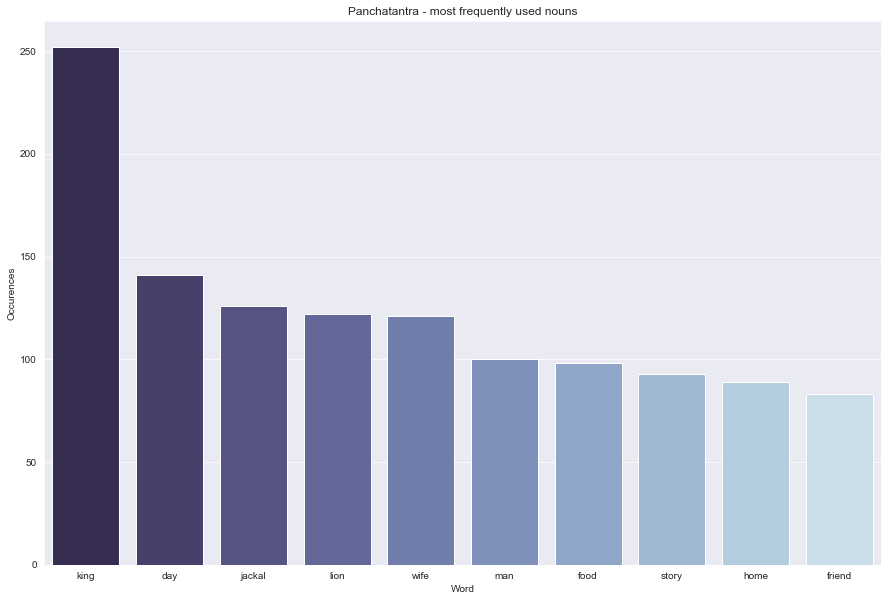

In [33]:
word_analysis(word_type='NN', how_much=10)

In [ ]:
# Reading the script
script = open("Panchatantra.txt", encoding = 'latin-1').read()

# Set of Stop words
#stopwords.append(word)
stopwords = set(STOPWORDS)
stopwords.add("who")
stopwords.add("what")
stopwords.add("will")
stopwords.add("said")
stopwords.add("asked")
stopwords.add("told")
stopwords.add("come")
stopwords.add("came")

# Create WordCloud
wc = WordCloud(background_color="white", stopwords=stopwords,  
               width=3600, height=2900, colormap=matplotlib.cm.inferno)

wc.generate(script)
# Show the WordCloud
plt.figure(figsize=[15, 10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")